# E13 project
---
## step1. 표정 데이터로 mobilenet 학습시키기
- 데이터셋 구경하기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:26<00:00, 1363.63it/s]

train : 32298, eval :3589


데이터 완비 확인을 위해 첫 데이터의 이미지, 라벨을 확인한다

Angry


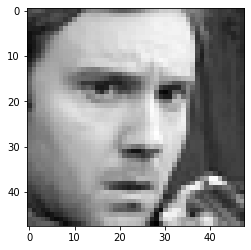

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

100 epoch만 학습하여 MobileNetV2 모델 학습하기

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

1 Physical GPUs, 1 Logical GPUs
Epoch 1/100
64/64 [==============================] - 85s 1s/step - loss: 1.8357 - categorical_accuracy: 0.2403 - val_loss: 1.9364 - val_categorical_accuracy: 0.1655
Epoch 2/100
64/64 [==============================] - 6s 97ms/step - loss: 1.6993 - categorical_accuracy: 0.3175 - val_loss: 1.9263 - val_categorical_accuracy: 0.1655
Epoch 3/100
64/64 [==============================] - 6s 96ms/step - loss: 1.5752 - categorical_accuracy: 0.3835 - val_loss: 1.9136 - val_categorical_accuracy: 0.1655
Epoch 4/100
64/64 [==============================] - 6s 97ms/step - loss: 1.4724 - categorical_accuracy: 0.4343 - val_loss: 1.9036 - val_categorical_accuracy: 0.1655
Epoch 5/100
64/64 [==============================] - 6s 97ms/step - loss: 1.3892 - categorical_accuracy: 0.4693 - val_loss: 1.8984 - val_categorical_accuracy: 0.1655
Epoch 6/100
64/64 [==============================] - 6s 97ms/step - loss: 1.3075 - categorical_accuracy: 0.5079 - val_loss: 1.8999 - val_ca

Epoch 50/100
64/64 [==============================] - 6s 87ms/step - loss: 0.1374 - categorical_accuracy: 0.9527 - val_loss: 2.5215 - val_categorical_accuracy: 0.1655
Epoch 51/100
64/64 [==============================] - 6s 88ms/step - loss: 0.1873 - categorical_accuracy: 0.9345 - val_loss: 2.4147 - val_categorical_accuracy: 0.1655
Epoch 52/100
64/64 [==============================] - 6s 88ms/step - loss: 0.1217 - categorical_accuracy: 0.9583 - val_loss: 2.5333 - val_categorical_accuracy: 0.1655
Epoch 53/100
64/64 [==============================] - 6s 88ms/step - loss: 0.2135 - categorical_accuracy: 0.9281 - val_loss: 2.4234 - val_categorical_accuracy: 0.1655
Epoch 54/100
64/64 [==============================] - 6s 87ms/step - loss: 0.2019 - categorical_accuracy: 0.9295 - val_loss: 2.7250 - val_categorical_accuracy: 0.1655
Epoch 55/100
64/64 [==============================] - 6s 88ms/step - loss: 0.1906 - categorical_accuracy: 0.9332 - val_loss: 2.6115 - val_categorical_accuracy: 0.165

64/64 [==============================] - 5s 86ms/step - loss: 0.1053 - categorical_accuracy: 0.9640 - val_loss: 4.9334 - val_categorical_accuracy: 0.4224
Epoch 100/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0474 - categorical_accuracy: 0.9839 - val_loss: 4.8639 - val_categorical_accuracy: 0.4263


## step 2. 학습된 모델을 TensorFlow.js 형식으로 변환하기

In [6]:
import os
model_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/model.h5'
model.save(model_path)

In [7]:
model_cp_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/model_cp.h5'
model.save(model_cp_path)

`pip install tensorflowjs`로 설치하여 tf.js가 활용할 수 있는 형태로 변환하기    
터미널에서 `tensorflowjs_converter` 명령어만 실행    
```shell
$ cd ~/aiffel/tfjs_mobile
$ tensorflowjs_converter --input_format=keras model.h5 model
```

## step 3. 카메라에서 가져온 영상 전처리하기

# tensorflow.js mobile project

In [5]:
# E13 project
---
## step1. 표정 데이터로 mobilenet 학습시키기
- 데이터셋 구경하기# E13 project
---
## step1. 표정 데이터로 mobilenet 학습시키기
- 데이터셋 구경하기

import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

데이터 완비 확인을 위해 첫 데이터의 이미지, 라벨을 확인한다

from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

100 epoch만 학습하여 MobileNetV2 모델 학습하기

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

## step 2. 학습된 모델을 TensorFlow.js 형식으로 변환하기

import os
model_path = os.getenv('HOME')+'/aiffel/e/tfjs_mobile/model.h5'
model.save(model_path)

`pip install tensorflowjs`로 설치하여 tf.js가 활용할 수 있는 형태로 변환하기    
터미널에서 `tensorflowjs_converter` 명령어만 실행    
```shell
$ cd ~/aiffel/tfjs_mobile
$ tensorflowjs_converter --input_format=keras model.h5 model
```

## step 3. 카메라에서 가져온 영상 전처리하기









SyntaxError: invalid syntax (<ipython-input-5-a9a75d56d272>, line 2)